In [32]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import os.path as op

In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

In [34]:
# Import data from path
files = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser("results")) for f in fn]
results_files = [f for f in files if ".csv" in f]
tmp = []

for f in results_files:
    df_tmp = pd.read_csv(f)
    tmp.append(df_tmp)

In [35]:
df_concat = pd.concat(tmp)
df_concat = df_concat[df_concat.get('relationships') != 'related']
df_concat['dataset'].value_counts()
df_concat

,Unnamed: 0,relationships,prompt_type,probability,group_id,model,dataset
36,36,non_afforded,explicit,0.598980,1,ViT-B-32,natural
37,37,non_afforded,explicit,0.001093,2,ViT-B-32,natural
38,38,non_afforded,explicit,0.008234,3,ViT-B-32,natural
39,39,non_afforded,explicit,0.000081,4,ViT-B-32,natural
40,40,non_afforded,explicit,0.110266,5,ViT-B-32,natural
...,...,...,...,...,...,...,...
67,67,non_afforded,implicit,0.033914,14,ViT-B-32,synthetic
68,68,non_afforded,implicit,0.005313,15,ViT-B-32,synthetic
69,69,non_afforded,implicit,0.118197,16,ViT-B-32,synthetic
70,70,non_afforded,implicit,0.632116,17,ViT-B-32,synthetic


/Users/kevinb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevinb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevinb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kevinb/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

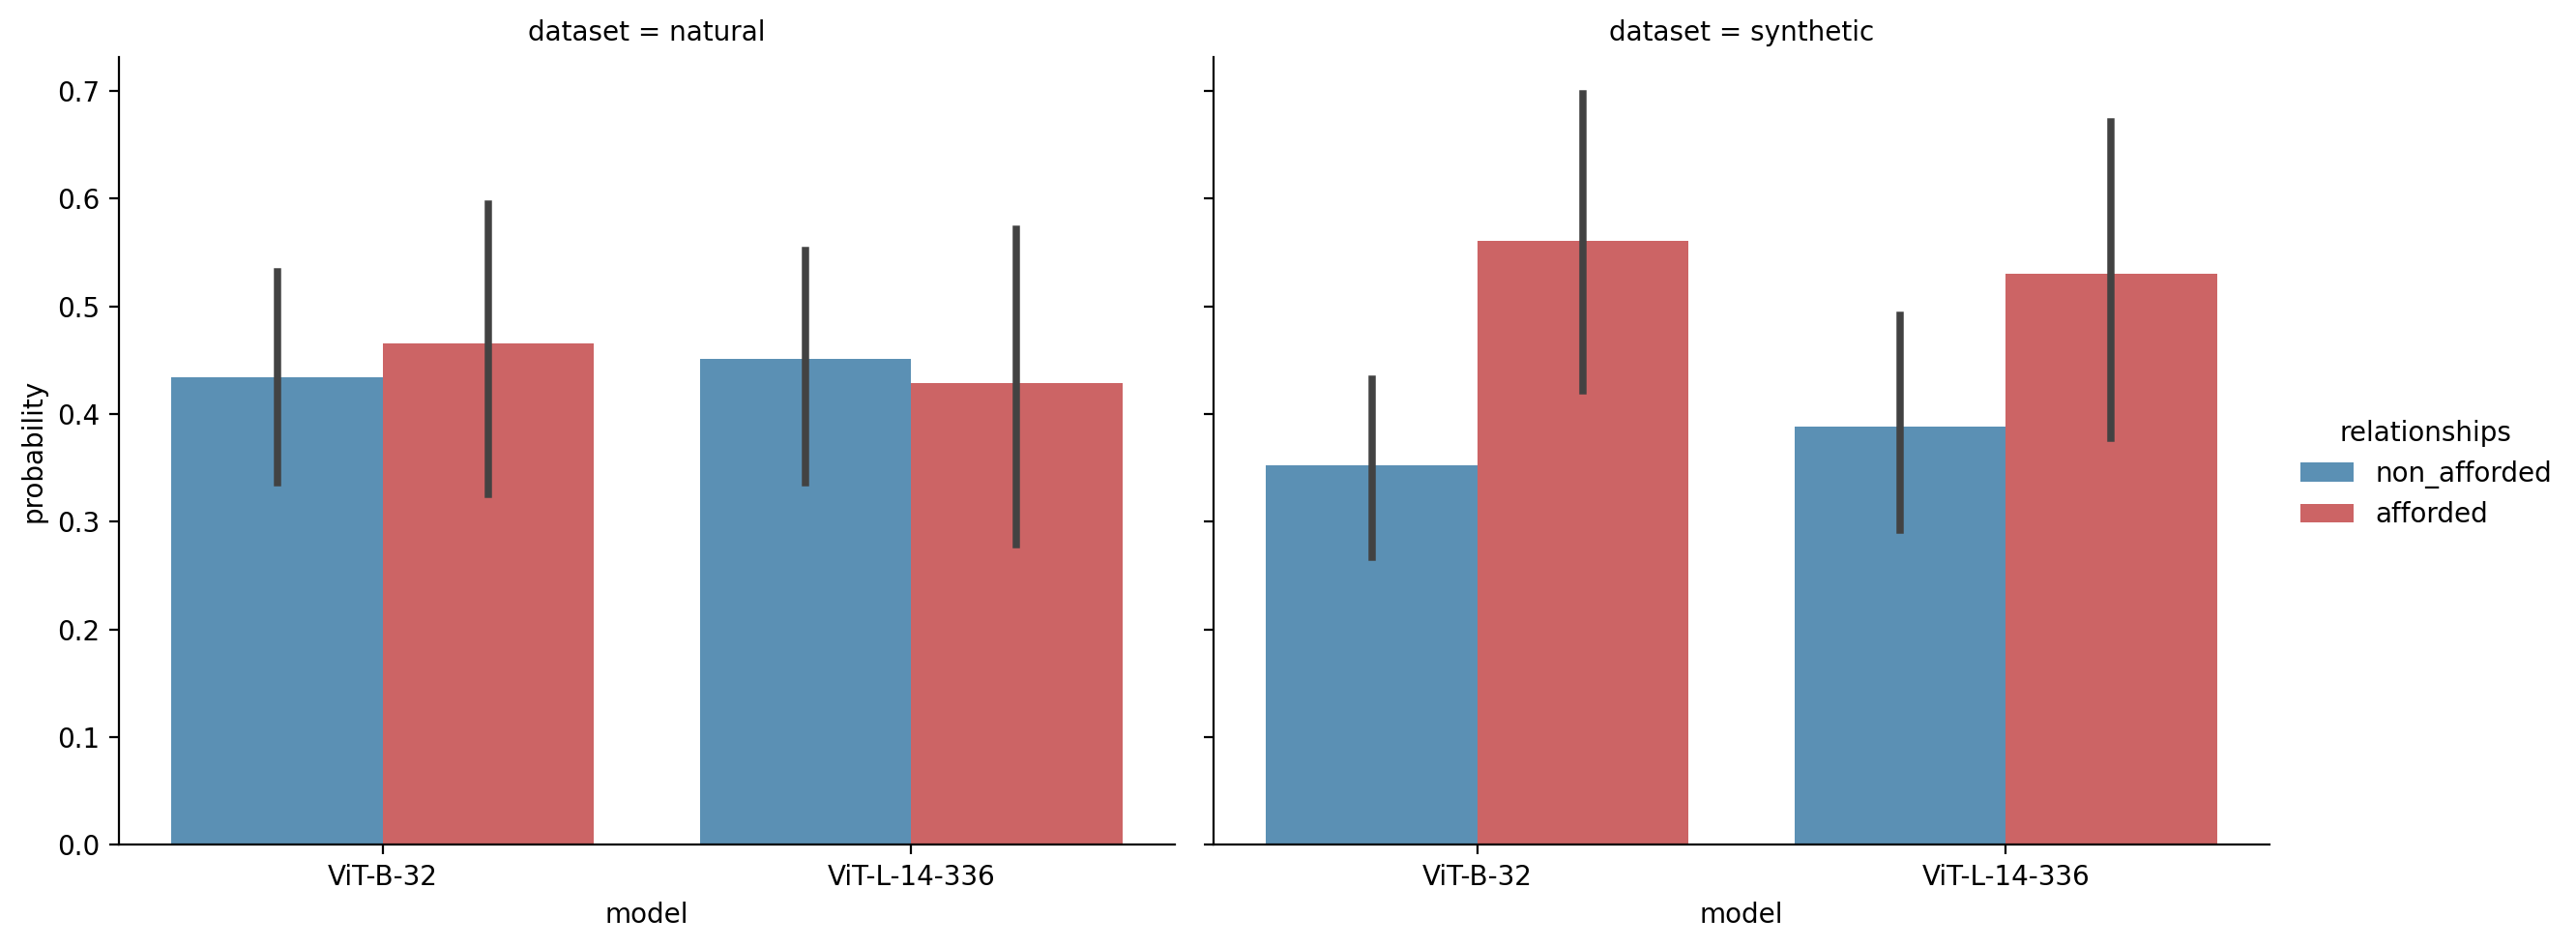

In [36]:
# Plots of Data
sns.catplot(data = df_concat,
            x = "model",
            y = "probability",
            hue = "relationships",
            col = "dataset",
            kind='bar',
            height= 5,
            aspect=1.2,
            palette= ['C0','C3'],
            alpha= 0.8)

In [38]:

from scipy.stats import ttest_ind
afforded = df_concat[df_concat["relationships"] == 'afforded']["probability"]
non_afforded = df_concat[df_concat["relationships"] == "non_afforded"]["probability"]
t, p_t = ttest_ind(afforded, non_afforded)
print(f"t = {t}, p = {p_t}", '\n')


import statsmodels.api as sm 
from statsmodels.formula.api import ols
model = ols('probability ~ C(relationships) + C(prompt_type) + C(relationships):C(prompt_type)', data=df_concat).fit()
anova_result = sm.stats.anova_lm(model, typ=2) 
print (anova_result,'\n')

t = 2.0481879439035233, p = 0.041148353473134384 

                                    sum_sq     df         F    PR(>F)
C(relationships)                  0.770477    1.0  4.177471  0.041576
C(prompt_type)                    0.023140    1.0  0.125463  0.723358
C(relationships):C(prompt_type)   0.012961    1.0  0.070272  0.791069
Residual                         78.938735  428.0       NaN       NaN 



/Users/kevinb/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
/Users/kevinb/anaconda3/lib/python3.10/site-packages/patsy/util.py:672: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
